In [1]:
import numpy as np
from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import dual_annealing
from numpy.random import rand
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from scipy.special import comb, perm

In [8]:
def Three_options(x,y):

    xD = x
    xC = y
    xL = 1-x-y

    M = 200
    N = 50
    # 相对效用
    betaD = 1.5  # 1.不合理的地方：betaD是1.5倍，d确是l的8倍
    betaC = 1.1
    # 成本
    d = 4
    c = 1
    l = 0.5
    
    Pd = 0 #内卷群体   的累加净收益
    Pc = 0 #sit-up群体  的累加净收集
    Pl = 0 #躺平群体    的累加净收益
    
    
    for Nd in range(0,N-1):
        for Nc in range(0,N-1-Nd):
            Nl = N-1-Nd-Nc
            pai_d = betaD*d*M/(betaD*(Nd+1)*d +betaC*Nc*c     +Nl*l)-d
            pai_c = betaC*c*M/(betaD*Nd*d     +betaC*(Nc+1)*c +Nl*l)-c
            pai_l =       l*M/(betaD*Nd*d     +betaC*Nc*c     +(Nl+1)*l)-l

            Pd += comb(N - 1, Nd) * comb(N - 1 - Nd, Nl) * (xD ** Nd) * (xC ** Nc) * (
                        xL ** Nl) * pai_d
            Pc += comb(N - 1, Nd) * comb(N - 1 - Nd, Nl) * (xD ** Nd) * (xC ** Nc) * (
                        xL ** Nl) * pai_c
            Pl += comb(N - 1, Nd) * comb(N - 1 - Nd, Nl) * (xD ** Nd) * (xC ** Nc) * (
                        xL ** Nl) * pai_l

    R_ = xD * Pd + xC * Pc + xL * Pl  ##均值
    xD_ = xD * (Pd - R_)
    xC_ = xC * (Pc - R_)
    xL_ = xL * (Pl - R_)
    return xD_

In [2]:
r_min, r_max = 0, 1
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.01)
yaxis = arange(r_min, r_max, 0.01)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)

In [3]:
length = 100
a = []
for i in range(0,length):
    a.append([j/length for j in range(0, length)])
a = np.array(a)
# print(a)
b = []
for i in range(0,length):
    b.append([i/length for j in range(0, length)])
b = np.array(b)

In [4]:
for i in range(length):
    for j in range(length):
        if a[i][j] +b[i][j] >1:
            a[i][j] = 0.3
            b[i][j] = 0.3

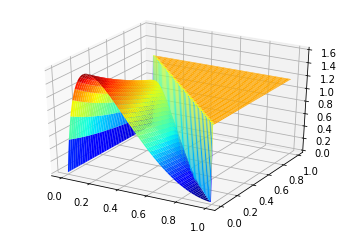

In [9]:
results = Three_options(a, b)
# create a surface plot with the jet color scheme
figure = pyplot.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
pyplot.show()